In [1]:
import pandas as pd
df = pd.read_csv('data.csv', index_col='Id')

# Tag analysis
We are going to have a look at the tags used in our [60,000 questions from StackOverflow with Quality Rating](https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate). It should give us a better understanding of the situation and, with a bit of work, we might already be able to spot some trends.

## Introduction
In this article, we want to do a few things using the `Tags` field. We want to have a look at what the bulk of the questions are about but we also want to see if there are some common combinations. All this will eventually be confronted to the quality of the post to try and identify trends.

To that end, we are going to use the `lambda` function, `df.groupby`, build cleaning functions, build a bag of words, create a wordcloud and use nltk's `FreqDist`.

## Imports and cleaning functions
Nothing too fancy with the cleaning functions but the one we are going to use for our wordclouds is a little more invasive to try and get rid of some noise.

In [2]:
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30,30)

In [3]:
def wc(text):
    """
    Cleaning function to be used with our first wordcloud
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('-','')
        tags = tags.replace('.','DOT')
        tags = tags.replace('c++','Cpp')
        tags = tags.replace('c#','Csharp')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
def clean_tags(text):
    """
    Cleaning function for tags
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'

## Wordclouds
`wordcloud()` needs a document of space-separated words. We are going to create a list of words then use the `' '.join()` method to build that document.

In [4]:
tags = [tag for i in df['Tags'].apply(lambda x: wc(x)) for tag in i.split()]

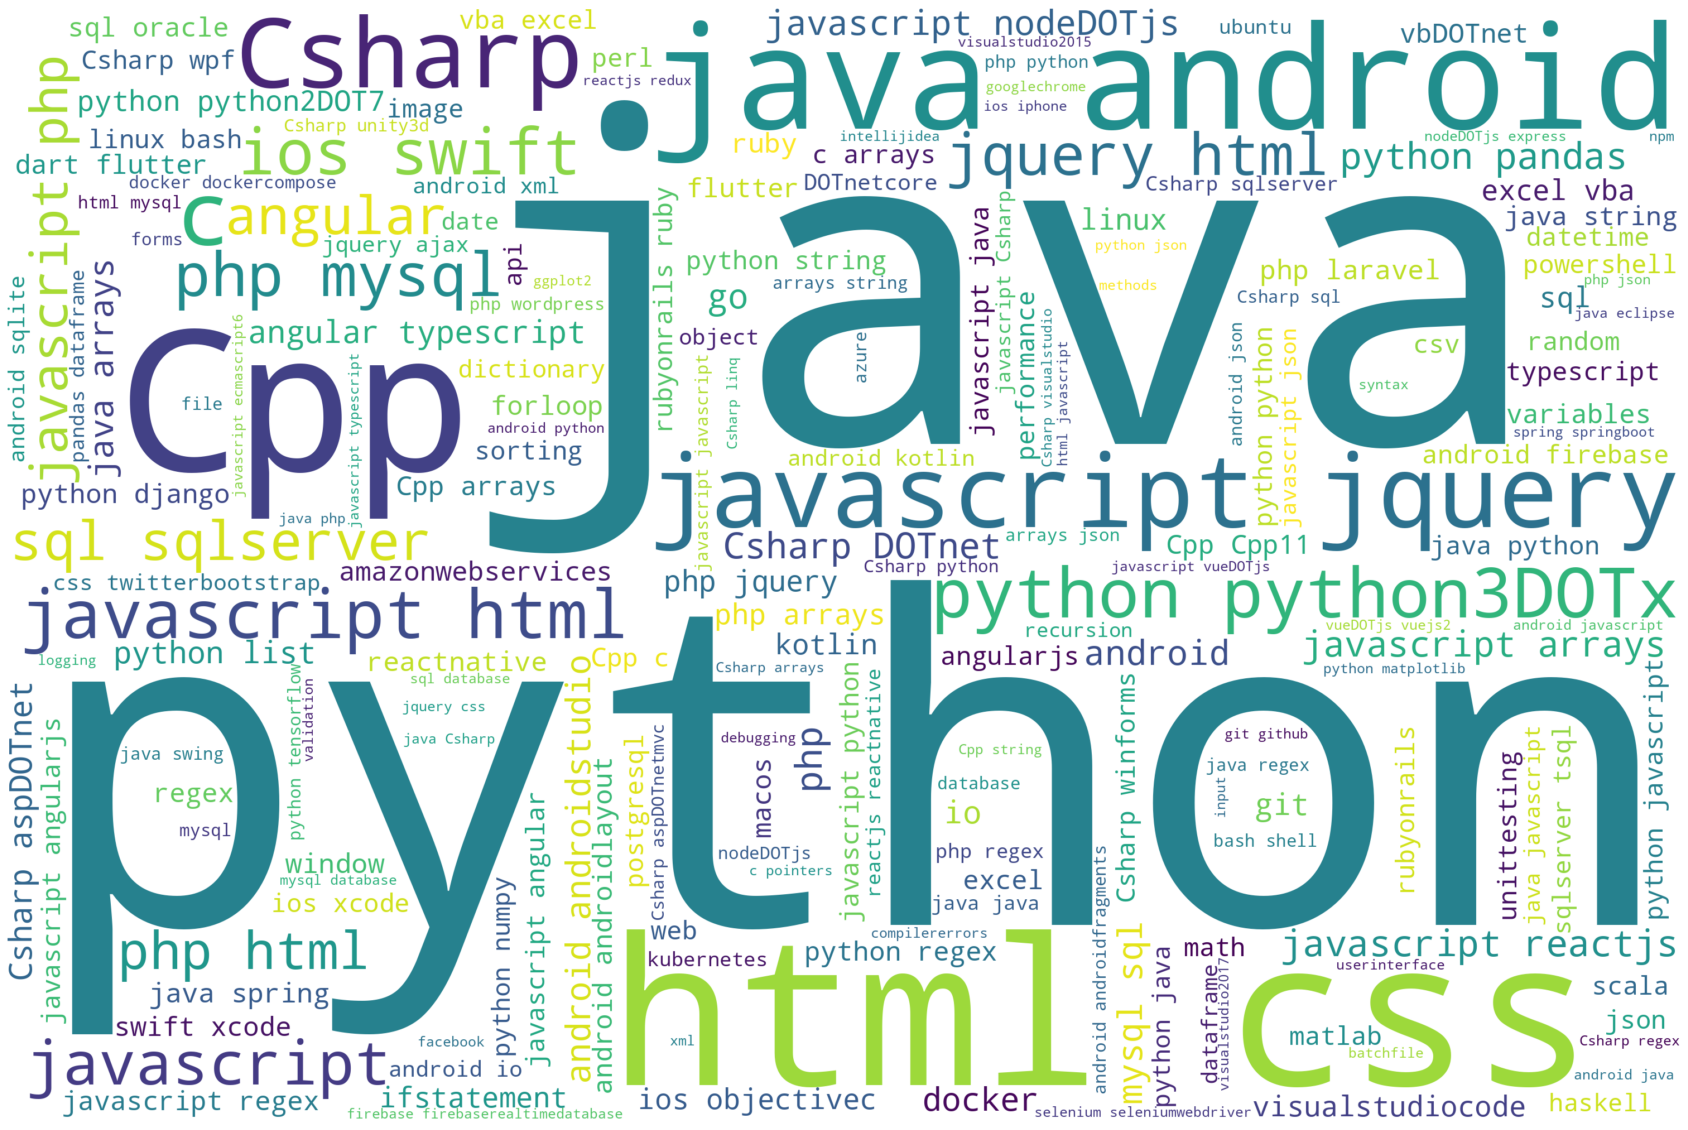

In [5]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      regexp = '\w+', # Allows C, R to be parsed as words
                      background_color = 'white'
                     )

wordcloud.generate(" ".join(tags))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
list(wordcloud.words_)[:20]

['java',
 'python',
 'html css',
 'Cpp',
 'java android',
 'javascript jquery',
 'Csharp',
 'c',
 'python python3DOTx',
 'javascript html',
 'ios swift',
 'javascript',
 'php mysql',
 'jquery html',
 'sql sqlserver',
 'angular',
 'php html',
 'javascript php',
 'javascript reactjs',
 'php']

We can see that although our list only contained single words, `wordcloud()` recognises some commonly paired ones.

A few things worth noticing as well:
- `java` and `python` seem to be the most asked about language, followed by `html css`.
- `javascript` seems to be quite high up as well but has been paired with other technologies like `html`,`jquery`, etc.
- Talking about pairs, we can already spot a few meaningful ones such as `java android` or less valuable like `python python 3.x`.

Let's look at the actual counts to see in which proportion those languages are talked about.

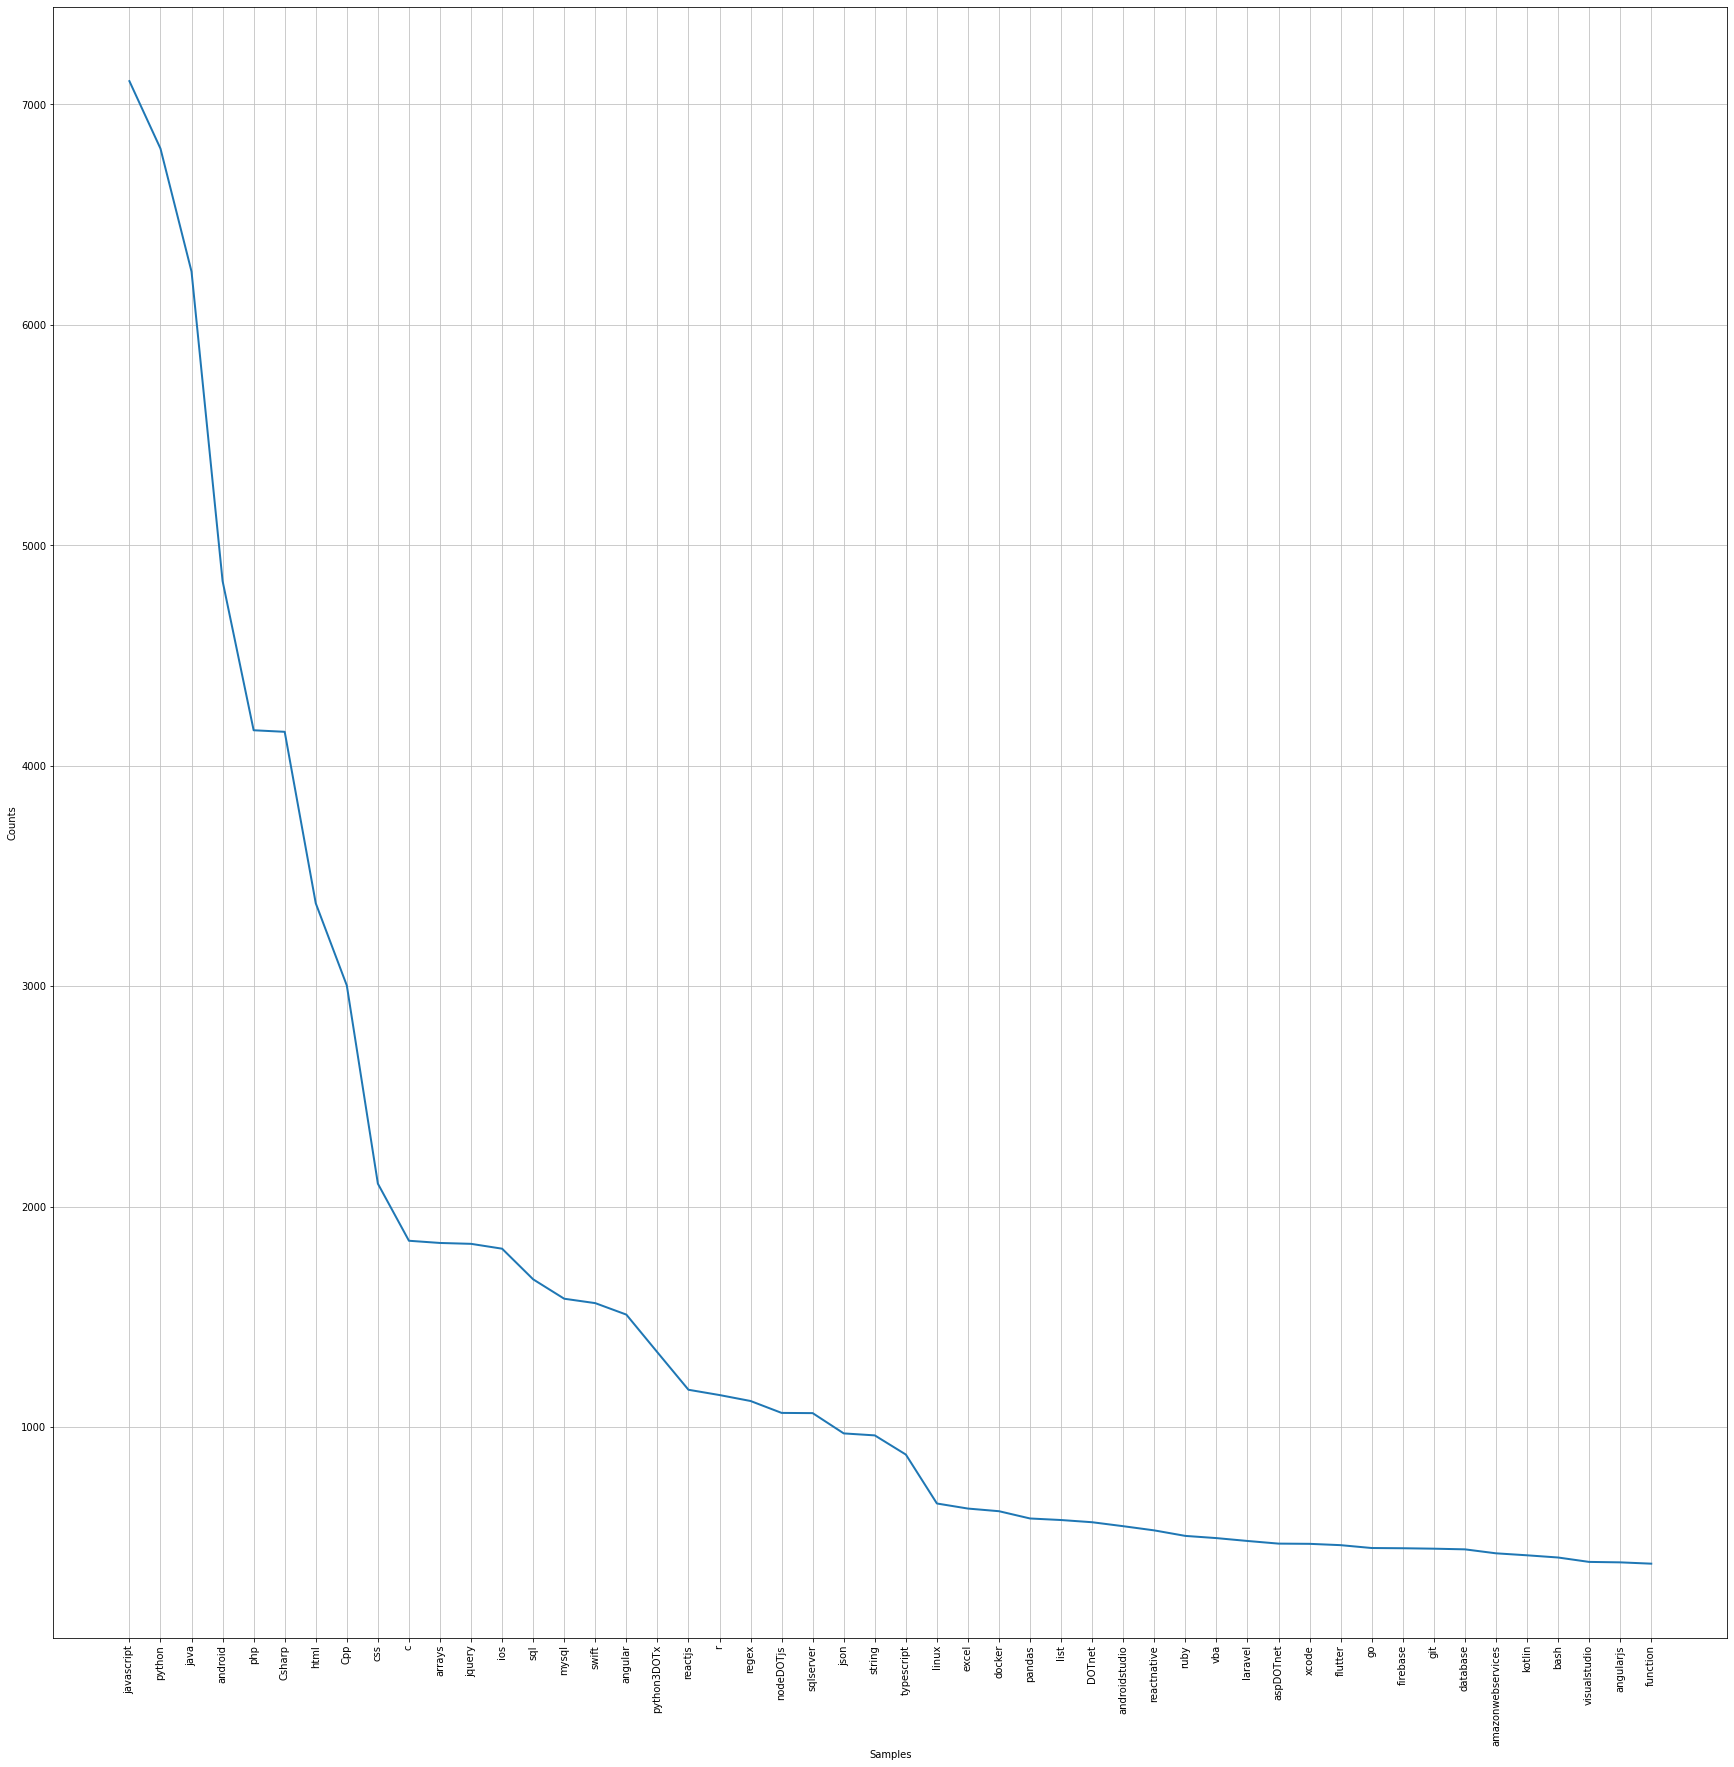

In [7]:
FreqDist(tags).plot(50)
plt.show()

It seems our assumption was correct, `javascript` is the most asked about language. But then `pyhon` overtakes `java` by a couple of hundred questions.

Let's double check this by reducing the list of tags to the first one only. We will assume programmers know how to tag a post, with the first tag being the core of the question, followed by other tags giving more context about the question.

In [8]:
first_tags = df['Tags'].apply(lambda x: wc(x)).apply(lambda x: x.split()[0])

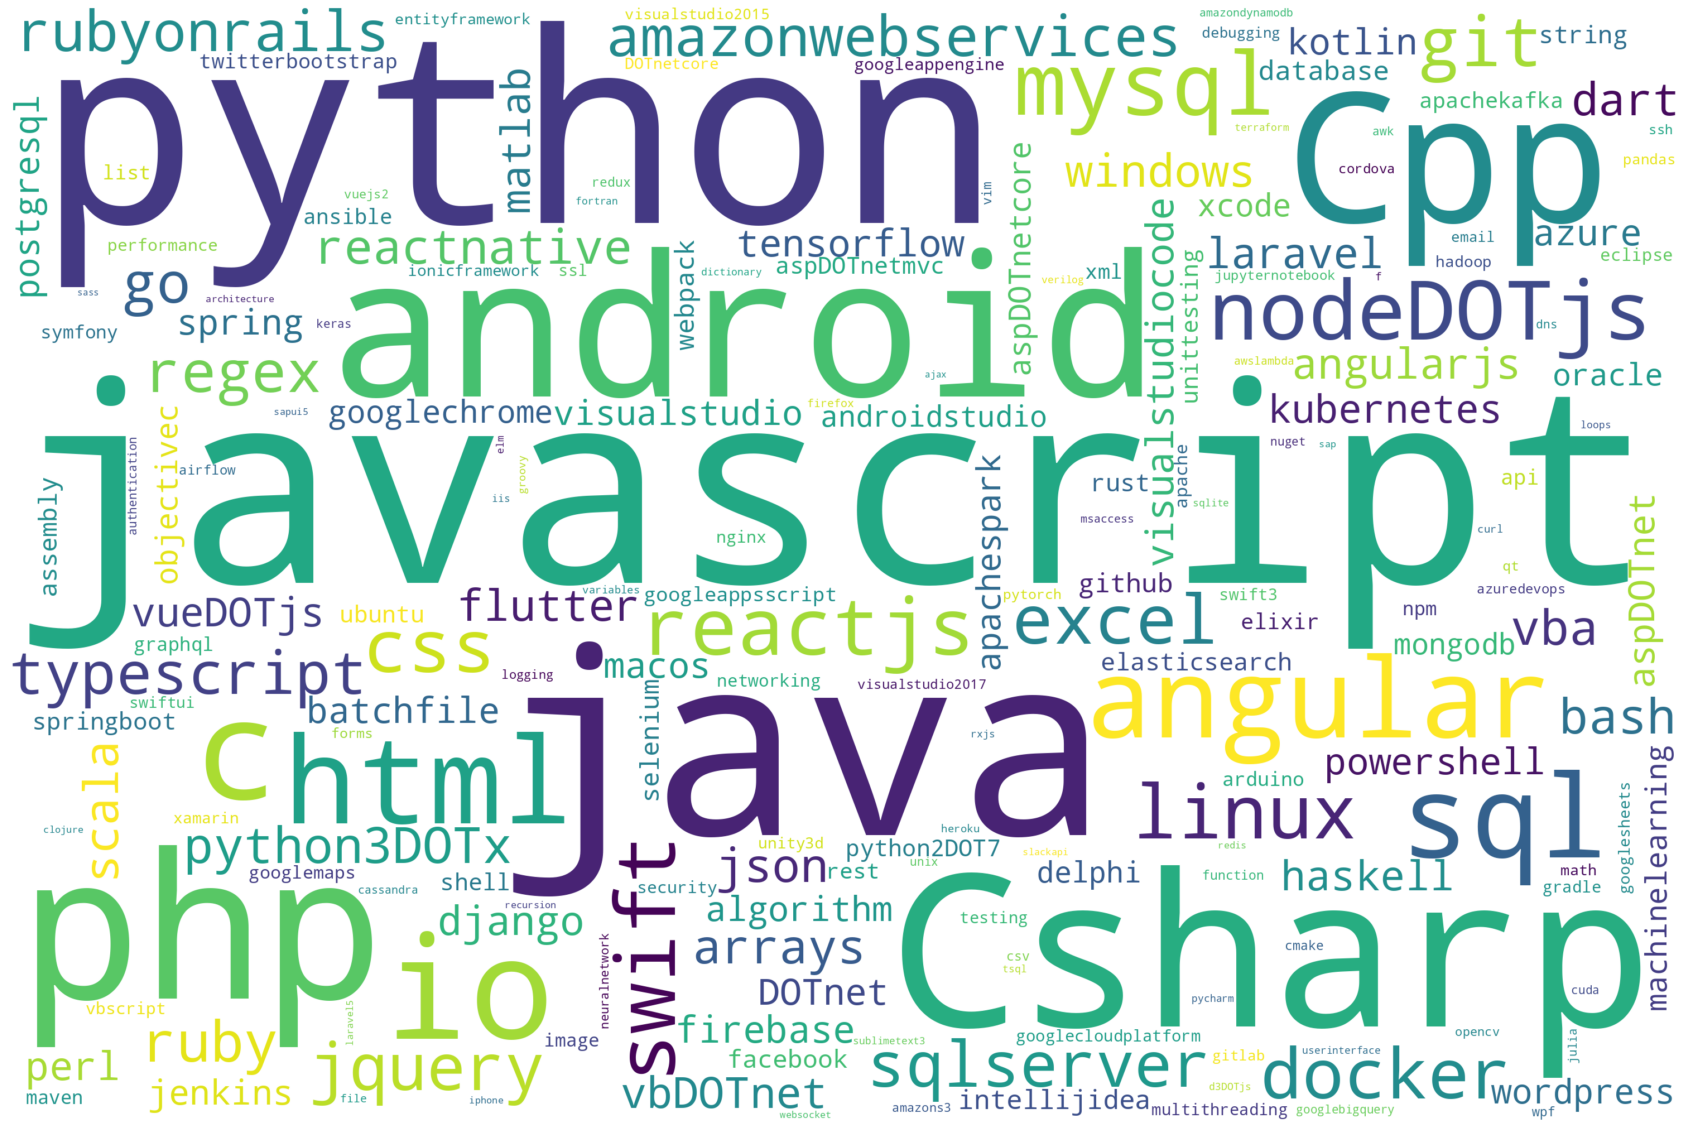

In [9]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      regexp = '\w+', # Allows C, R to be parsed as words
                      background_color = 'white'
                     )

wordcloud.generate(" ".join(first_tags))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
list(wordcloud.words_)[:20]

['javascript',
 'python',
 'java',
 'Csharp',
 'php',
 'android',
 'Cpp',
 'io',
 'c',
 'html',
 'sql',
 'angular',
 'mysql',
 'swift',
 'nodeDOTjs',
 'reactjs',
 'linux',
 'css',
 'docker',
 'git']

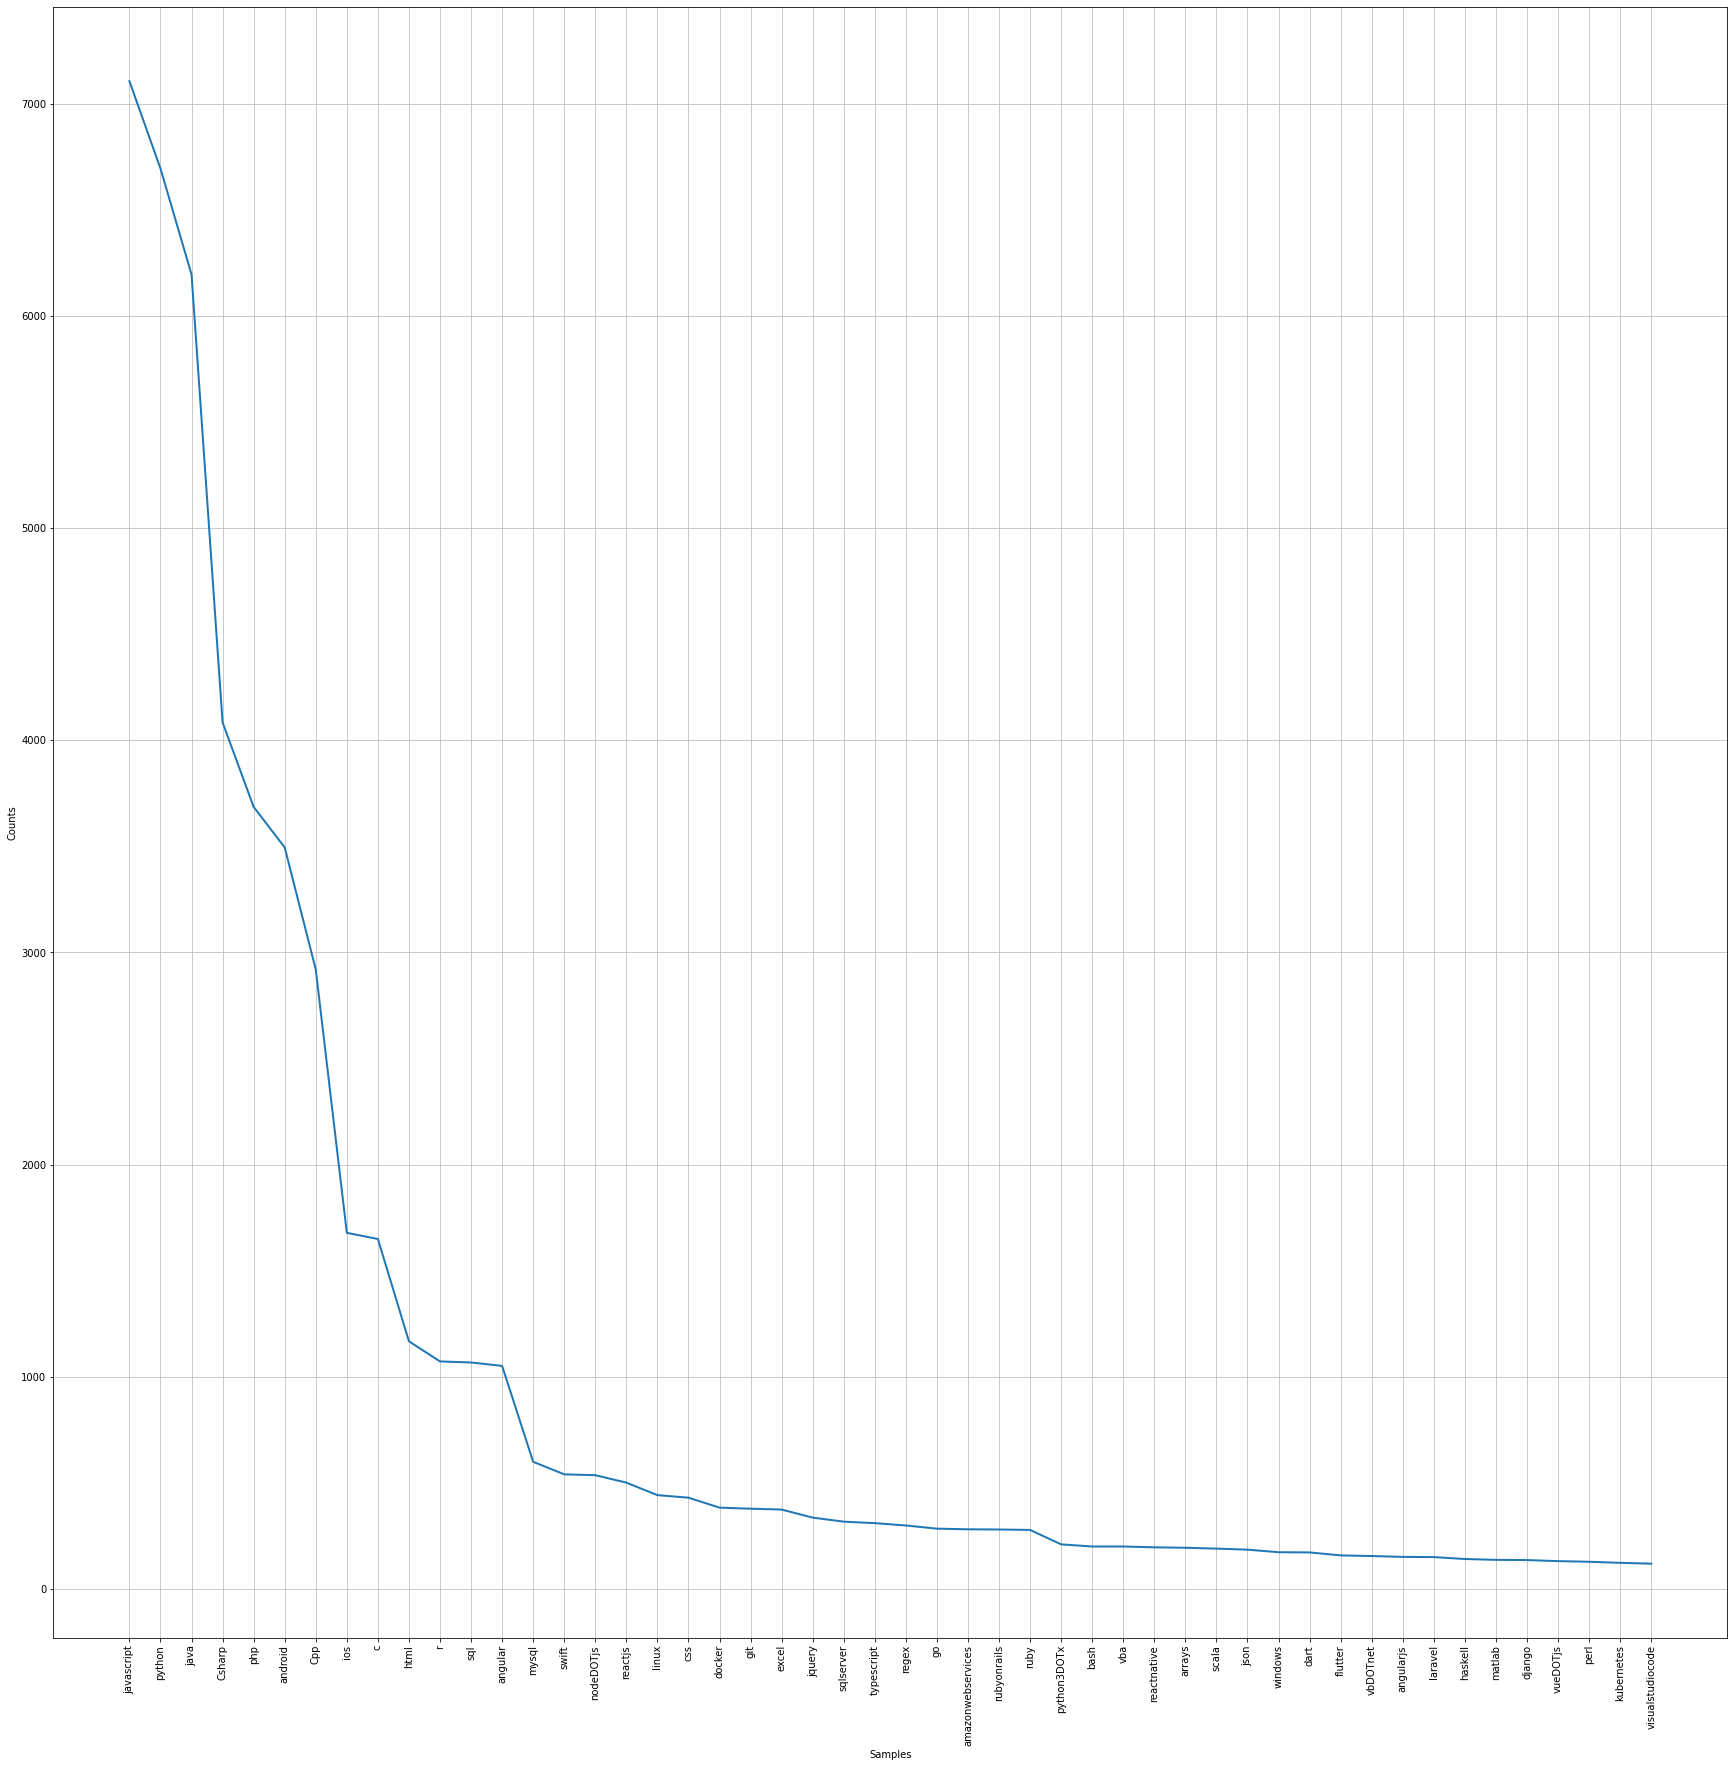

In [11]:
FreqDist(first_tags).plot(50)
plt.show()

So most questions on SO are about `javascript`, `python`, `java` and `c#`.

Let's have a deeper look at the top languages by taking a bag of words approach.
### Javascript

In [12]:
bag = {}
for tag in df['Tags'].apply(lambda x: clean_tags(x)):
    # Get the previous entry, or 0 if not yet documented; add 1
    bag[tag] = bag.get(tag, 0) + 1 

In [13]:
for words in sorted(bag, key=bag.get, reverse=True):
    if 'javascript' in words:
        print(words, bag[words])

javascript 879
javascript jquery 348
javascript html 260
javascript jquery html 156
javascript html css 148
javascript jquery html css 116
javascript arrays 114
javascript reactjs 113
javascript regex 111
javascript php 55
javascript node.js 54
javascript angularjs 52
javascript json 50
javascript php html 48
javascript ecmascript-6 45
javascript angular 34
javascript typescript 34
javascript css 33
javascript jquery css 28
javascript vue.js 26
javascript arrays json 25
javascript jquery ajax 23
javascript angular typescript 23
javascript php jquery 20
javascript lodash 20
javascript jquery json 20
javascript php jquery html 17
javascript arrays sorting 17
javascript date 16
javascript php jquery ajax 16
javascript reactjs react-hooks 16
javascript reactjs react-native 15
javascript webpack 15
javascript vue.js vuejs2 15
javascript php html css 14
javascript momentjs 14
javascript arrays object 14
javascript google-maps 13
javascript object 13
javascript react-native 13
javascript reac

javascript angular rollupjs 1
javascript php validation cakephp master-pages 1
javascript download html5-video 1
javascript recursion while-loop functional-programming tail-call-optimization 1
javascript class typescript ecmascript-6 1
javascript arrays loops for-loop 1
javascript reactjs constructor ecmascript-6 arrow-functions 1
javascript jquery slider 1
javascript jquery html forms checkbox 1
javascript html forms onsubmit 1
javascript google-sheets google-sheets-api 1
javascript functional-programming redux ngrx 1
javascript java c 1
javascript c# debugging visual-studio-code 1
javascript reactjs mocking sinon jestjs 1
javascript java google-maps 1
javascript c# sql asp.net 1
javascript node.js express url 1
javascript jquery ajax django 1
javascript html asp.net 1
javascript charts 1
javascript jquery html svg 1
javascript php jquery html twitter-bootstrap 1
javascript tampermonkey 1
javascript symfony highcharts twig 1
javascript jquery html css pageload 1
javascript reactjs bab

Javascript is usually associated with `jquery`, `html` and `css`. `reactjs` and `regex` are also worth noticing but if you were thinking about a webdev career, I guess now you know where to start :)

### Python

In [14]:
for words in sorted(bag, key=bag.get, reverse=True):
    if 'python' in words:
        print(words, bag[words])

python 1068
python python-3.x 375
python pandas 155
python regex 98
python list 86
python python-2.7 77
python-3.x 72
python django 53
python dictionary 44
python numpy 43
python pandas dataframe 41
python matplotlib 40
python tkinter 37
python string 31
python tensorflow 29
python list dictionary 27
python python-2.7 python-3.x 24
python arrays numpy 23
python function 20
python python-3.x python-2.7 20
python opencv 19
python json 19
python csv 18
python python-3.x tkinter 18
python python-3.x list 18
python flask 16
python arrays 16
python selenium 16
python pandas numpy 15
python pytest 13
python if-statement 13
python pygame 13
python regex python-3.x 13
python python-3.x dictionary 13
python algorithm 12
python syntax 12
python file 12
python linux 12
python pycharm 11
python scikit-learn 11
python string list 11
python turtle-graphics 11
python list list-comprehension 10
python beautifulsoup 10
python anaconda 10
python airflow 10
python pip 9
python datetime 9
python apache-spa

python cgi server-side-scripting 1
python ipython-notebook jupyter xgboost 1
python numpy time-complexity 1
python function args 1
python openstack 1
python-3.x vtk maya-api 1
python linux automated-tests vi 1
python numpy importerror 1
python deprecation-warning 1
python-2.7 web-scraping beautifulsoup urllib2 1
python python-2.7 unc network-share 1
python logging uwsgi 1
python attributeerror timedelta 1
python python-3.x sqlalchemy entity-relationship 1
python python-3.x printing 1
python linux python-3.x ubuntu jupyter-notebook 1
python pip pytorch requirements.txt 1
python csv import-from-csv 1
python r linux awk sed 1
java python do-while 1
python windows command-line tensorflow installation 1
python cx-freeze 1
python amazon-web-services aws-lambda 1
python bitcoin blockchain 1
python xpath 1
python python-3.x variables global-variables 1
python bots 1
python python-3.x hashlib 1
python scikit-learn auc 1
python twitter twitter-oauth tweepy 1
python rest gunicorn session-timeout 

python windows tkinter 1
python windows if-statement 1
python oh-my-zsh libcrypto macos-catalina 1
python function append 1
python multidimensional-array 1
python google-cloud-platform automl 1
python list indexing range 1
python regex word generate 1
python tcp tshark pyshark 1
python-3.x boolean-operations or-operator 1
python machine-learning data-science 1
python regex lua 1
python r json pandas 1
python sum 1
python generator yield-return 1
python tkinter widget 1
python-3.x pywinauto 1
python django linux cron scheduled-tasks 1
python csv export 1
python error-handling geopandas 1
python regex python-3.x string 1
python python-3.x python-typing 1
python text-manipulation 1
python dictionary data-structures 1
python python-3.8 1
python list sortedlist 1
python mysql sql database scrapy 1
php python html browser execution 1
python arrays brute-force 1
python-3.x amazon-web-services aws-lambda 1
python graph cluster-computing networkx knn 1
python pandas coercion 1
python amazon-s3 

We can see `pandas`, `regex`, `lists` and `dictionaries` are troubling pythonistas. `django` and `tkinter` are also up there but the bulk of people posting questions on Stack Overflow are doing data analysis/ data science.

### Java

In [15]:
for words in sorted(bag, key=bag.get, reverse=True):
    if 'java' in words and 'javascript' not in words:
        print(words, bag[words])

java 1013
java android 339
java arrays 100
java string 60
java regex 55
java android android-studio 45
java arraylist 34
java eclipse 28
java swing 24
java android xml 22
java java-8 20
java javafx 20
java collections 20
java java-8 java-stream 19
java android json 19
java for-loop 17
java android sqlite 17
java selenium 17
java algorithm 15
java spring spring-boot 15
java spring 15
java recursion 15
java generics 15
java json 15
java multithreading 15
java java.util.scanner 14
java if-statement 14
java android firebase firebase-realtime-database 14
java arrays arraylist 13
java android android-layout 13
java methods 12
java oop 12
java android nullpointerexception 12
java file 12
java arrays string 12
java android kotlin 12
java android android-fragments 11
java exception 11
java mysql 11
java nullpointerexception 11
java loops 11
java java-stream 11
java random 11
java android sqlite android-sqlite 10
java android-studio 10
java date 10
java hashmap 10
java c++ 10
java linked-list 10

android multithreading android-asynctask rx-java android-handler 1
java intellij-idea decompiler 1
java scala try-with-resources 1
java list sorting 2d points 1
java spring-security spring-boot jwt 1
java vert.x 1
java algorithm cloud 1
java arrays sorting dutch-national-flag-problem 1
java java-8 openjdk 1
java postscript apache-fop 1
java android android-activity view fragment 1
java activemq messagebroker broker 1
java arrays arraylist java.util.scanner 1
java eclipse coding-style refactoring automated-refactoring 1
java loops math standard-deviation 1
java tostring equation 1
java database poker 1
java random numbers 1
java spring event-handling akka 1
java multithreading instrumentation .class-file 1
java android dependency-injection dagger-2 dagger 1
java parameters trim next 1
java math trigonometry 1
java string parameters parameter-passing 1
java rest spring-boot swagger swagger-ui 1
java oop private main 1
java html database web server 1
java android arrays json jsonobject 1


java liskov-substitution-principle 1
java spring-boot junit 1
java swing line-breaks 1
java jsp spring-mvc shiro 1
java asp.net 1
java spring aspectj 1
java android android-keystore 1
java android marker 1
java csv hashmap compare 1
java rx-java rx-java2 1
java android exception 1
java expression extraction 1
java android xml splash-screen 1
java unit-testing junit resultset 1
java spring-boot swagger springfox 1
java maven maven-3 java-9 1
hadoop authentication configuration java-8 ioexception 1
java gradle xsd jaxb xjc 1
java json spring spring-boot jackson 1
java batch-file command-prompt minecraft gzip 1
java time time-complexity 1
java arrays collision 1
java methods try-catch 1
java spring jsf jsf-2 managed-bean 1
java spring lambda jdbctemplate 1
java android android-studio webview android-webview 1
java string java-8 java-7 text-manipulation 1
java symbols cannot-find-symbol 1
java selenium selenium-webdriver drag-and-drop 1
java swing jframe jpanel layout-manager 1
java unit-t

java eclipse tomcat8 java-10 ubuntu-18.04 1
spring-boot javamail spring-webflux reactive-streams 1
java eclipse maven java-10 1
java string indexing 1
java android gradle kotlin abstract-syntax-tree 1
java android adb 1
java arrays sockets file-transfer 1
java localdate date 1
java compiler-errors java.util.scanner 1
java servlets illegalargumentexception 1
java algorithm matrix graph-algorithm adjacency-matrix 1
java android bitmap android-arrayadapter android-glide 1
java fonts responsive 1
java android xml android-studio-3.0 1
java arrays object variables 1
java spring-batch 1
java generics interface 1
java methods syntax format 1
java sockets ftp client 1
java selenium user-interface testing automation 1
java android android-recyclerview android-viewmodel android-paging 1
java php sockets javafx websocket 1
java android listview gridview android-gridview 1
java android android-layout button 1
java android android-wifi file-sharing 1
java android sql database sqlite 1
java string fo

java date java-8 1
java azure azure-blob-storage 1
java python printing raspberry-pi 1
java docker alpine 1
java jsf primefaces managed-bean trinidad 1
java spring-boot spring-mvc tomcat8 1
java android android-studio jsoup 1
java if-statement intellij-idea return return-type 1
java morse-code 1
java tomcat 1
java docker tomcat kubernetes 1
java java.util.scanner delimiter 1
java spring-security bcrypt 1
java android android-webview 1
java c android-studio 1
java mysql sql jdbc 1
java dayofweek java.util.calendar 1
java bigdecimal 1
java android drawing 1
java contains .class-file 1
java java-time localdate 1
java docker dockerfile solaris-10 1
java php hmac 1
java vector 1
java selenium selenium-webdriver webdriver 1
java equality 1
java integer 1
java socket.io 1
java php android jsonresponse 1
java keyword 1
java htmlunit 1
java windows batch-file jmeter 1
java graphics 1
java android android-studio gradle kotlin 1
java string date date-conversion 1
java numbers divide 1
java multit

On SO, the `java` community seems to be significantly focused on `android` and `java-8` development. Most of the question being about fundamentals of `java`: `arrays`, `string`, `arraylist`, `for-loop`.
## Quality
Is there any link between the topic of a question and its quality?

In [24]:
df[df['Tags'].str.contains('python')]['Y'].value_counts()

LQ_CLOSE    2653
LQ_EDIT     2369
HQ          2140
Name: Y, dtype: int64

In [25]:
df[df['Tags'].str.contains('java')]['Y'].value_counts()

LQ_CLOSE    5762
LQ_EDIT     4623
HQ          3022
Name: Y, dtype: int64

In [26]:
df[df['Tags'].str.contains('javascript')]['Y'].value_counts()

LQ_CLOSE    2956
LQ_EDIT     2221
HQ          1936
Name: Y, dtype: int64

In [ ]:
df.groupby(['Y',df['Tags'].apply(lambda x: clean_tags(x)).apply(lambda x: x.split()[0])]).first()